In [1]:
import pandas as pd

In [8]:
df1 = pd.read_csv('../단기모멘텀.csv', dtype={'ticker':str})
df1

,date,시가,고가,저가,종가,거래량,등락률,ticker,ret_1d,ret_5d,ret_20d
0,2015-01-02,23100,23100,22350,22600,184419,-2.795699,000080,NaN,NaN,NaN
1,2015-01-05,22600,23150,22400,23050,170602,1.991150,000080,0.019912,NaN,NaN
2,2015-01-06,22750,23100,22550,22650,142141,-1.735358,000080,-0.017354,NaN,NaN
3,2015-01-07,22650,23050,22350,22700,159007,0.220751,000080,0.002208,NaN,NaN
4,2015-01-08,22600,23100,22600,22850,126066,0.660793,000080,0.006608,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
443040,2024-12-23,29100,30100,29050,29550,888310,2.961672,489790,0.029617,-0.166432,-0.245211
443041,2024-12-24,29950,31350,29100,30400,984329,2.876481,489790,0.028765,-0.136364,-0.181696
443042,2024-12-26,30900,31450,30300,30600,557107,0.657895,489790,0.006579,-0.102639,-0.111756
443043,2024-12-27,30150,32100,29700,31150,991359,1.797386,489790,0.017974,-0.020440,-0.103597


In [7]:
df2 = pd.read_csv('../24.12_수급,거래 데이터.csv', dtype={'ticker':str})
df2

,date,기관_순매수_수량,개인_순매수_수량,외국인_순매수_수량,기관_순매수_금액,개인_순매수_금액,외국인_순매수_금액,ticker
0,2015-01-02,-20583,-5925,21466,-27448674000,-7894072000,28661116000,005930
1,2015-01-02,-386,-120,-254,-42528500,-12981500,-29541000,081660
2,2015-01-02,-18542,3887,14775,-2961457500,618899500,2361638000,011170
3,2015-01-02,37829,-42088,3202,2448649700,-2724920700,208450900,004020
4,2015-01-02,-48774,52045,-3006,-2877642700,3065262700,-171978900,066570
...,...,...,...,...,...,...,...,...
441259,2024-12-30,6317,-4052,-2175,265011350,-169348600,-91903750,111770
441260,2024-12-30,14331,-5451,-8889,1210694000,-462952200,-748486700,000120
441261,2024-12-30,-138785,253017,-113510,-5318526450,9752750850,-4404797250,035720
441262,2024-12-30,47818,-50146,3054,12056720000,-12697136000,824242000,051910


In [5]:
df1.columns

Index(['date', '시가', '고가', '저가', '종가', '거래량', '등락률', 'ticker', 'ret_1d',
       'ret_5d', 'ret_20d'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443045 entries, 0 to 443044
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     443045 non-null  object 
 1   시가       443045 non-null  int64  
 2   고가       443045 non-null  int64  
 3   저가       443045 non-null  int64  
 4   종가       443045 non-null  int64  
 5   거래량      443045 non-null  int64  
 6   등락률      443006 non-null  float64
 7   ticker   443045 non-null  object 
 8   ret_1d   442845 non-null  float64
 9   ret_5d   442045 non-null  float64
 10  ret_20d  439045 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 37.2+ MB


In [6]:
df2.columns

Index(['date', '기관_순매수_수량', '개인_순매수_수량', '외국인_순매수_수량', '기관_순매수_금액',
       '개인_순매수_금액', '외국인_순매수_금액', 'ticker'],
      dtype='object')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441264 entries, 0 to 441263
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        441264 non-null  object
 1   기관_순매수_수량   441264 non-null  int64 
 2   개인_순매수_수량   441264 non-null  int64 
 3   외국인_순매수_수량  441264 non-null  int64 
 4   기관_순매수_금액   441264 non-null  int64 
 5   개인_순매수_금액   441264 non-null  int64 
 6   외국인_순매수_금액  441264 non-null  int64 
 7   ticker      441264 non-null  object
dtypes: int64(6), object(2)
memory usage: 26.9+ MB


In [12]:
# 1. 날짜 컬럼을 datetime 형식으로 통일 (오류 방지)
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

In [13]:
# df1(가격 정보)을 기준으로 df2(수급 정보)를 병합
merged_df = pd.merge(df1, df2, on=['date', 'ticker'], how='left')

# 결과 확인
print(f"df1 길이: {len(df1)}")
print(f"df2 길이: {len(df2)}")
print(f"병합된 데이터 길이: {len(merged_df)}")

df1 길이: 443045
df2 길이: 441264
병합된 데이터 길이: 443045


In [14]:
# 수급 관련 컬럼 리스트 (df2에 있던 컬럼들)
investor_cols = [
    '기관_순매수_수량', '개인_순매수_수량', '외국인_순매수_수량',
    '기관_순매수_금액', '개인_순매수_금액', '외국인_순매수_금액'
]

# 결측치를 0으로 채우기
merged_df[investor_cols] = merged_df[investor_cols].fillna(0)

# 데이터 확인
display(merged_df.head())

,date,시가,고가,저가,종가,거래량,등락률,ticker,ret_1d,ret_5d,ret_20d,기관_순매수_수량,개인_순매수_수량,외국인_순매수_수량,기관_순매수_금액,개인_순매수_금액,외국인_순매수_금액
0,2015-01-02,23100,23100,22350,22600,184419,-2.795699,000080,NaN,NaN,NaN,5000.0,15122.0,-20122.0,1.141317e+08,343190350.0,-457322050.0
1,2015-01-05,22600,23150,22400,23050,170602,1.991150,000080,0.019912,NaN,NaN,30713.0,-24478.0,240.0,7.027537e+08,-562542500.0,7207350.0
2,2015-01-06,22750,23100,22550,22650,142141,-1.735358,000080,-0.017354,NaN,NaN,-656.0,12773.0,-9046.0,-1.292970e+07,286978450.0,-204244150.0
3,2015-01-07,22650,23050,22350,22700,159007,0.220751,000080,0.002208,NaN,NaN,6944.0,-13387.0,6443.0,1.577346e+08,-303838950.0,146104300.0
4,2015-01-08,22600,23100,22600,22850,126066,0.660793,000080,0.006608,NaN,NaN,-48235.0,15447.0,31808.0,-1.098155e+09,348779800.0,726834950.0


학습 데이터: (342677, 11), 테스트 데이터: (96168, 11)
테스트 기간: 2023-01-02 00:00:00 ~ 2024-12-27 00:00:00

--- 2024-12-27 00:00:00 기준 단기 상승 예측 Top 5 ---


,ticker,pred_return
167142,010130,0.048549
287584,047050,0.014015
267920,036460,0.013424
442203,454910,0.006983
299874,052690,0.004828


c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

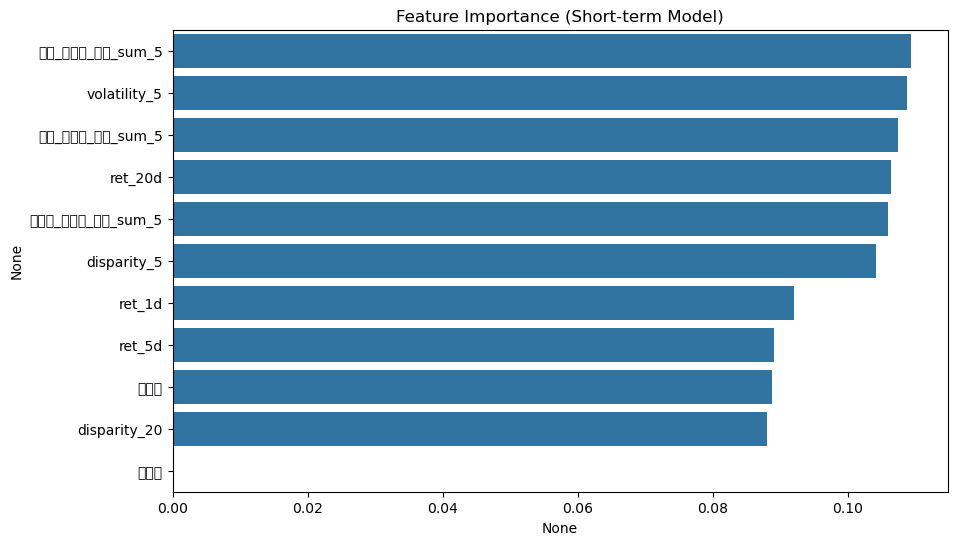

In [15]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# ---------------------------------------------------------
# 1. 파생 변수 생성 (Feature Engineering)
# ---------------------------------------------------------
# 데이터프레임 복사 (원본 보존)
df = merged_df.copy()

# 정렬 (날짜순 정렬이 되어야 shift, rolling이 정확함)
df = df.sort_values(['ticker', 'date'])

# (1) 수급 지표 추가: '스마트 머니'의 흐름 포착
# 외국인/기관의 5일(일주일), 20일(한달) 누적 순매수 금액 (수량보다 금액이 더 정확함)
for col in ['외국인_순매수_금액', '기관_순매수_금액', '개인_순매수_금액']:
    df[f'{col}_sum_5'] = df.groupby('ticker')[col].rolling(window=5).sum().reset_index(0, drop=True)
    df[f'{col}_sum_20'] = df.groupby('ticker')[col].rolling(window=20).sum().reset_index(0, drop=True)

# (2) 기술적 지표 추가: 단기 과열/침체 판단
# 5일, 20일 이동평균선
df['ma_5'] = df.groupby('ticker')['종가'].rolling(window=5).mean().reset_index(0, drop=True)
df['ma_20'] = df.groupby('ticker')['종가'].rolling(window=20).mean().reset_index(0, drop=True)

# 이격도 (현재가 / 이동평균선): 100보다 크면 과열, 작으면 침체
df['disparity_5'] = df['종가'] / df['ma_5']
df['disparity_20'] = df['종가'] / df['ma_20']

# 변동성 (최근 5일간 등락률의 표준편차): 리스크 지표
df['volatility_5'] = df.groupby('ticker')['등락률'].rolling(window=5).std().reset_index(0, drop=True)

# (3) Target 생성: 우리가 맞혀야 할 정답 (내일의 등락률)
# ret_1d(오늘 수익률)를 -1칸 shift 하여 '내일 수익률'을 만듦
df['target_return'] = df.groupby('ticker')['ret_1d'].shift(-1)

# ---------------------------------------------------------
# 2. 데이터 정제 (NaN 제거 및 컬럼 선택)
# ---------------------------------------------------------
# 이동평균(20일) 등으로 인해 앞부분에 NaN이 생김 -> 제거
df = df.dropna()

# 학습에 사용할 Feature 선정
features = [
    'ret_1d', 'ret_5d', 'ret_20d', '거래량', '등락률',  # 기존 가격 정보
    '외국인_순매수_금액_sum_5', '기관_순매수_금액_sum_5', '개인_순매수_금액_sum_5', # 단기 수급
    'disparity_5', 'disparity_20', 'volatility_5' # 기술적 지표
]

target = 'target_return'

# ---------------------------------------------------------
# 3. Train / Test 분리 (Time-Series Split)
# ---------------------------------------------------------
# 랜덤 분리가 아닌, '과거' 데이터로 학습해 '미래'를 맞춰야 함
dates = df['date'].unique()
split_idx = int(len(dates) * 0.8) # 날짜 기준 80% 지점
split_date = dates[split_idx]

train_df = df[df['date'] < split_date]
test_df = df[df['date'] >= split_date]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

print(f"학습 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")
print(f"테스트 기간: {test_df['date'].min()} ~ {test_df['date'].max()}")

# ---------------------------------------------------------
# 4. XGBoost 모델 학습 (단기 점수 산출용)
# ---------------------------------------------------------
# regressor: 수익률(수치)을 예측
model = XGBRegressor(
    n_estimators=300,  # 나무의 개수
    learning_rate=0.05, # 학습률
    max_depth=6,       # 나무의 깊이
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ---------------------------------------------------------
# 5. 예측 및 결과 확인
# ---------------------------------------------------------
# 예측 실행
pred = model.predict(X_test)

# 결과 데이터프레임 생성
result_df = test_df[['date', 'ticker', 'target_return']].copy()
result_df['pred_return'] = pred # 예측된 내일 수익률 (이게 '단기 점수'가 됩니다)
result_df['diff'] = result_df['pred_return'] - result_df['target_return']

# Top 10 종목 뽑기 (가장 최근 날짜 기준)
recent_date = result_df['date'].max()
top_10 = result_df[result_df['date'] == recent_date].sort_values(by='pred_return', ascending=False).head(10)

print(f"\n--- {recent_date} 기준 단기 상승 예측 Top 5 ---")
display(top_10[['ticker', 'pred_return']].head(5))

# 변수 중요도 확인 (모델이 뭘 중요하게 봤는지)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# (한글 폰트 설정이 필요할 수 있습니다. 깨지면 영문으로 변경하세요)
# plt.rc('font', family='Malgun Gothic') 

feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance (Short-term Model)")
plt.show()

Train: (196488, 10), Val: (90194, 10), Test: (141386, 10)
모델 학습 완료!

=== 2024-01-02 기준 향후 10일 수익률 예측 Top 10 ===


,ticker,종가,predicted_return_10d,rank,disparity_5,disparity_10,disparity_20
181648,011200,20600,0.030827,1.0,1.037470,1.071521,1.169890
393156,180640,78200,0.030037,2.0,1.075358,1.128590,1.264656
441961,454910,112800,0.022947,3.0,1.003559,1.013477,1.144248
408651,251270,58000,0.015880,4.0,1.012216,1.018258,1.017455
360896,112610,70500,0.013354,5.0,1.036765,1.062067,1.169057
442738,457190,33600,0.012674,6.0,1.040248,1.007194,0.973857
425765,298040,157700,0.010119,7.0,0.971897,0.951490,0.899832
328942,079550,128300,0.009922,8.0,0.978792,0.959181,1.048974
152152,009420,43200,0.009247,9.0,1.041215,1.140143,1.191889
417160,272210,18160,0.008663,10.0,1.049226,1.079988,1.101908


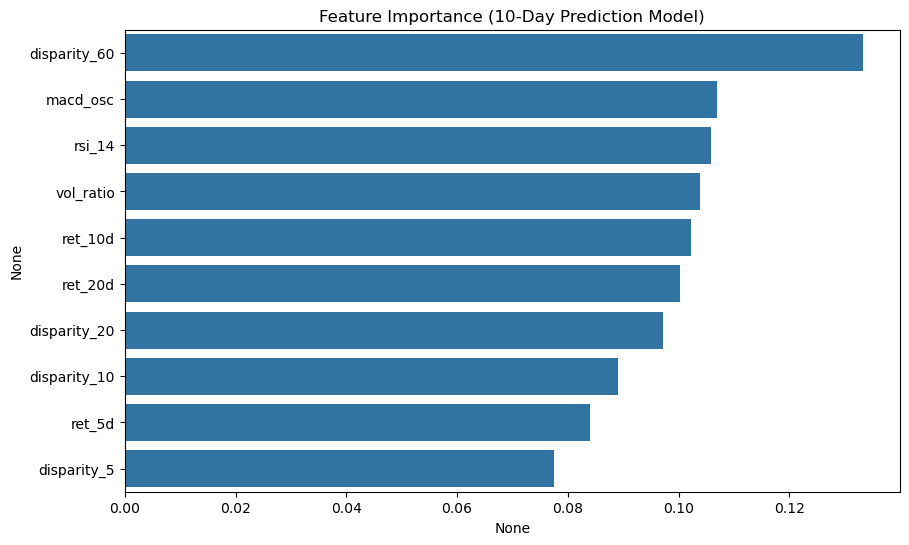

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor

# 1. 데이터 준비 (가정: merged_df가 이미 로드되어 있음)
# 날짜 처리를 위해 복사본 생성
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['ticker', 'date'])

# -----------------------------------------------------------
# 2. Feature Engineering (객관적으로 필요한 핵심 지표 생성)
# -----------------------------------------------------------

# (1) Target 생성: 10일 후 수익률 (우리가 맞춰야 할 정답)
# shift(-10)은 10일 뒤의 데이터를 현재 행으로 가져옴
df['target_10d'] = df.groupby('ticker')['종가'].pct_change(periods=10).shift(-10)

# (2) 이동평균 이격도 (Disparity): 현재 주가가 평균 대비 어디에 있는가?
# 단기(5, 10), 중기(20), 장기(60)
for w in [5, 10, 20, 60]:
    ma = df.groupby('ticker')['종가'].rolling(window=w).mean().reset_index(0, drop=True)
    df[f'disparity_{w}'] = df['종가'] / ma

# (3) RSI (상대강도지수): 14일 기준 과매수/과매도 판단 (매우 중요)
def calc_rsi(x, window=14):
    delta = x.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['rsi_14'] = df.groupby('ticker')['종가'].transform(lambda x: calc_rsi(x))

# (4) MACD (추세 전환 지표)
def calc_macd(x):
    exp12 = x.ewm(span=12, adjust=False).mean()
    exp26 = x.ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd - signal # MACD Oscillator (히스토그램)

df['macd_osc'] = df.groupby('ticker')['종가'].transform(lambda x: calc_macd(x))

# (5) 거래량 변동성 (Volume Ratio) - 기획서 아이디어 차용
# 최근 5일 평균 거래량이 20일 평균 대비 얼마나 터졌나?
vol_5 = df.groupby('ticker')['거래량'].rolling(window=5).mean().reset_index(0, drop=True)
vol_20 = df.groupby('ticker')['거래량'].rolling(window=20).mean().reset_index(0, drop=True)
df['vol_ratio'] = vol_5 / vol_20

# (6) 과거 수익률 (Momentum)
df['ret_5d'] = df.groupby('ticker')['종가'].pct_change(periods=5)
df['ret_10d'] = df.groupby('ticker')['종가'].pct_change(periods=10)
df['ret_20d'] = df.groupby('ticker')['종가'].pct_change(periods=20)

# -----------------------------------------------------------
# 3. 데이터 분할 (기획서 Page 3의 기간 준수)
# -----------------------------------------------------------
features = [
    'disparity_5', 'disparity_10', 'disparity_20', 'disparity_60',
    'rsi_14', 'macd_osc', 'vol_ratio',
    'ret_5d', 'ret_10d', 'ret_20d'
    # 수급 데이터가 있다면 여기에 추가 (예: '외국인_순매수_금액_sum_5' 등)
]

# 결측치 제거 (이동평균 등으로 인한 NaN)
model_df = df.dropna(subset=features + ['target_10d'])

# 기간 설정 
train = model_df[model_df['date'].between('2015-01-01', '2019-12-31')]
val = model_df[model_df['date'].between('2020-01-01', '2021-12-31')]
test = model_df[model_df['date'].between('2022-01-01', '2024-12-31')]

X_train, y_train = train[features], train['target_10d']
X_val, y_val = val[features], val['target_10d']
X_test, y_test = test[features], test['target_10d']

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -----------------------------------------------------------
# 4. XGBoost 단일 모델 학습
# -----------------------------------------------------------
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=20 # 과적합 방지
)

# Validation set을 사용하여 학습 조기 종료(Early Stopping) 적용
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)

print("모델 학습 완료!")

# -----------------------------------------------------------
# 5. 특정 날짜 기준 Top N 추천 함수
# -----------------------------------------------------------
def get_ranking_on_date(target_date, top_n=10):
    """
    특정 날짜를 입력하면 모델이 예측한 기대수익률이 높은 순서대로 종목을 반환
    """
    target_date = pd.to_datetime(target_date)
    
    # 해당 날짜의 데이터 추출
    daily_data = df[df['date'] == target_date].copy()
    
    if daily_data.empty:
        return "해당 날짜의 데이터가 없습니다. 휴장일인지 확인해주세요."
    
    # 결측치가 있는 경우 제외 (Feature 계산 불가 종목)
    daily_data = daily_data.dropna(subset=features)
    
    if daily_data.empty:
        return "데이터 부족으로 예측할 수 없습니다."

    # 예측 수행
    predictions = model.predict(daily_data[features])
    
    # 결과 정리
    daily_data['predicted_return_10d'] = predictions
    daily_data['rank'] = daily_data['predicted_return_10d'].rank(ascending=False)
    
    # Top N 추출 및 깔끔한 출력
    result = daily_data.sort_values(by='predicted_return_10d', ascending=False).head(top_n)
    
    # 출력 컬럼 선택
    display_cols = ['ticker', '종가', 'predicted_return_10d', 'rank'] + features[:3] # 주요 피처 몇 개만 확인
    return result[display_cols]

# 예시: Test 기간 중 하루를 선택해 순위 뽑기
input_date = '2024-01-02' # 원하시는 날짜로 변경 가능
ranking_result = get_ranking_on_date(input_date)

print(f"\n=== {input_date} 기준 향후 10일 수익률 예측 Top 10 ===")
display(ranking_result)

# 변수 중요도 시각화 (모델이 뭘 보고 뽑았는지 확인)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance (10-Day Prediction Model)")
plt.show()

=== 전략 백테스트 성과 (2022 ~ 2024) ===
--------------------------------------------------
Metric               | Top 10 Strategy | Benchmark      
--------------------------------------------------
누적 수익률 (%)           |          -82.9% |            6.2%
연환산 수익률 (%)          |          -45.4% |            2.1%
Sharpe Ratio         |          -1.36  |           0.20
MDD (%)              |          -83.4% |          -21.0%
--------------------------------------------------


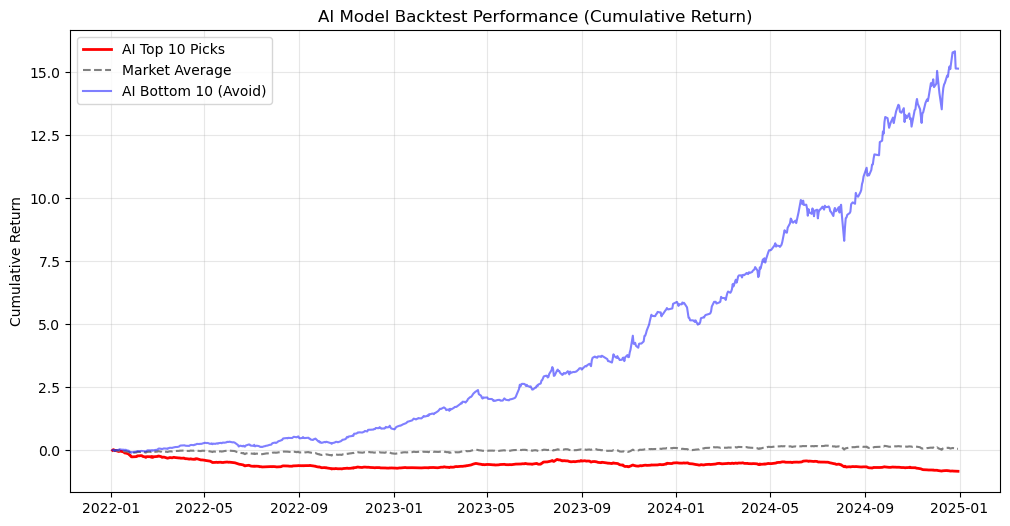

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------------
# 1. 테스트 데이터에 예측값 입히기
# -----------------------------------------------------------
# Test 기간 데이터 가져오기
backtest_df = df[df['date'].between('2022-01-01', '2024-12-31')].copy()

# 모델로 예측 실행 (이 점수가 높을수록 주가가 오를 것으로 예측)
# 주의: Feature들은 학습 때와 동일해야 합니다.
backtest_df['pred_score'] = model.predict(backtest_df[features])

# -----------------------------------------------------------
# 2. 일별 포트폴리오 수익률 계산 (Top 10 전략)
# -----------------------------------------------------------
# 날짜별로 수익률을 저장할 리스트
daily_returns = []
dates = []

# 날짜별 반복 (Day-by-Day Simulation)
unique_dates = backtest_df['date'].unique()

for d in unique_dates:
    # 해당 날짜의 데이터 추출
    day_data = backtest_df[backtest_df['date'] == d]
    
    # 데이터가 너무 적으면 패스 (최소 10개 이상)
    if len(day_data) < 10:
        continue
        
    # 1. AI 예측 점수 상위 10개 종목 선정 (Long)
    top_10 = day_data.sort_values(by='pred_score', ascending=False).head(10)
    
    # 2. 하위 10개 종목 선정 (비교용)
    bottom_10 = day_data.sort_values(by='pred_score', ascending=True).head(10)
    
    # 3. 수익률 계산
    # ret_1d는 '오늘 사서 내일 팔았을 때의 수익률'이라고 가정 (Shift된 데이터인지 확인 필요)
    # 만약 ret_1d가 '어제 사서 오늘 판 수익률'이라면, 내일 날짜의 ret_1d를 가져와야 함.
    # 여기서는 ret_1d가 해당 날짜 매수 후 1일 보유 수익률(Next Day Return)이라고 가정하고 계산
    
    # Top 10 평균 수익률 (동일 비중 투자)
    long_ret = top_10['ret_1d'].mean()
    
    # 하위 10 평균 수익률
    short_ret = bottom_10['ret_1d'].mean()
    
    # 벤치마크 (시장 평균)
    market_ret = day_data['ret_1d'].mean()
    
    daily_returns.append({
        'date': d,
        'Strategy (Top 10)': long_ret,
        'Bottom 10': short_ret,
        'Benchmark (Avg)': market_ret
    })

# 결과 데이터프레임 생성
perf_df = pd.DataFrame(daily_returns).set_index('date')
perf_df = perf_df.sort_index()

# -----------------------------------------------------------
# 3. 성과 지표 계산 (누적 수익률, Sharpe, MDD)
# -----------------------------------------------------------
# (1) 누적 수익률 (Cumulative Return)
# (1 + r)의 누적 곱
cum_ret = (1 + perf_df).cumprod() - 1

# (2) 연환산 수익률 (CAGR)
total_days = len(perf_df)
final_return = cum_ret.iloc[-1]
cagr = (1 + final_return) ** (252 / total_days) - 1

# (3) 샤프 지수 (Sharpe Ratio)
# (일평균 수익률 / 수익률 표준편차) * sqrt(252)
# 무위험 수익률은 편의상 0으로 가정
daily_std = perf_df.std()
sharpe = (perf_df.mean() / daily_std) * np.sqrt(252)

# (4) MDD (Maximum Drawdown)
# 누적 자산 곡선 계산
wealth_index = (1 + perf_df).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks
mdd = drawdown.min()

# 결과 출력
print("=== 전략 백테스트 성과 (2022 ~ 2024) ===")
print("-" * 50)
print(f"{'Metric':<20} | {'Top 10 Strategy':<15} | {'Benchmark':<15}")
print("-" * 50)
print(f"{'누적 수익률 (%)':<20} | {final_return['Strategy (Top 10)']*100:>14.1f}% | {final_return['Benchmark (Avg)']*100:>14.1f}%")
print(f"{'연환산 수익률 (%)':<20} | {cagr['Strategy (Top 10)']*100:>14.1f}% | {cagr['Benchmark (Avg)']*100:>14.1f}%")
print(f"{'Sharpe Ratio':<20} | {sharpe['Strategy (Top 10)']:>14.2f}  | {sharpe['Benchmark (Avg)']:>14.2f}")
print(f"{'MDD (%)':<20} | {mdd['Strategy (Top 10)']*100:>14.1f}% | {mdd['Benchmark (Avg)']*100:>14.1f}%")
print("-" * 50)

# -----------------------------------------------------------
# 4. 시각화 (누적 수익률 그래프)
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret['Strategy (Top 10)'], label='AI Top 10 Picks', color='red', linewidth=2)
plt.plot(cum_ret.index, cum_ret['Benchmark (Avg)'], label='Market Average', color='gray', linestyle='--')
plt.plot(cum_ret.index, cum_ret['Bottom 10'], label='AI Bottom 10 (Avoid)', color='blue', alpha=0.5)

plt.title('AI Model Backtest Performance (Cumulative Return)')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

학습 데이터: 287516건, 테스트 데이터: 141735건


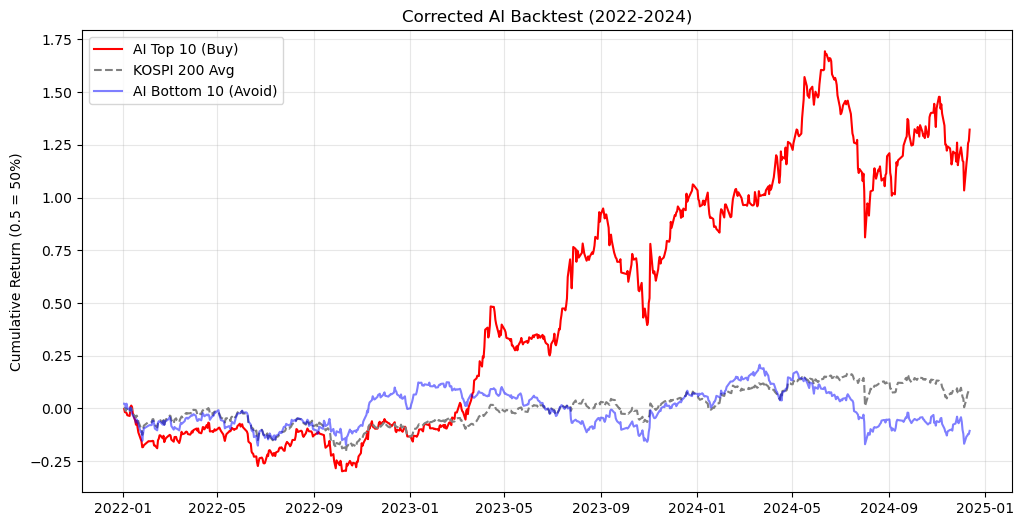

=== 최종 누적 수익률 (2022~2024) ===
AI Top 10 전략: 132.24%
시장 평균 (BM): 8.33%
AI Bottom 10 : -10.63%


In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 데이터 안전 가공 (수익률 단위 오류 원천 차단)
# -----------------------------------------------------------
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['ticker', 'date'])

# [핵심 수정 1] 수익률을 종가 기준으로 직접 재계산 (단위 오류 방지)
# 0.03 = 3% 상승 / -0.01 = 1% 하락
df['daily_ret'] = df.groupby('ticker')['종가'].pct_change()

# [핵심 수정 2] 백테스트용 '내일 수익률' 생성 (미래 참조 방지)
# 오늘 예측해서 샀다면, 수익은 '내일' 발생함
df['next_day_ret'] = df.groupby('ticker')['daily_ret'].shift(-1)

# [핵심 수정 3] Target 생성 (10일 후 수익률)
df['target_10d'] = df.groupby('ticker')['종가'].pct_change(periods=10).shift(-10)

# -----------------------------------------------------------
# 2. 기술적 지표 생성 (Feature Engineering)
# -----------------------------------------------------------
# 이동평균 이격도
for w in [5, 20, 60]:
    ma = df.groupby('ticker')['종가'].rolling(window=w).mean().reset_index(0, drop=True)
    df[f'disparity_{w}'] = df['종가'] / ma

# RSI (14일)
def calc_rsi(x, window=14):
    delta = x.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-9) # 0 나누기 방지
    return 100 - (100 / (1 + rs))

df['rsi_14'] = df.groupby('ticker')['종가'].transform(lambda x: calc_rsi(x))

# 모멘텀
df['mom_5'] = df.groupby('ticker')['종가'].pct_change(periods=5)
df['mom_20'] = df.groupby('ticker')['종가'].pct_change(periods=20)

# -----------------------------------------------------------
# 3. 모델 학습 (Train / Test 분리)
# -----------------------------------------------------------
features = ['disparity_5', 'disparity_20', 'disparity_60', 'rsi_14', 'mom_5', 'mom_20']

# NaN 제거 (데이터 정제)
model_df = df.dropna(subset=features + ['target_10d', 'next_day_ret'])

# 기간 분리 (기획서 기준)
train = model_df[model_df['date'].between('2015-01-01', '2021-12-31')] # Train + Val 합침
test = model_df[model_df['date'].between('2022-01-01', '2024-12-31')]

print(f"학습 데이터: {len(train)}건, 테스트 데이터: {len(test)}건")

# XGBoost 모델링
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

model.fit(train[features], train['target_10d'])

# -----------------------------------------------------------
# 4. 백테스트 (오류 수정됨)
# -----------------------------------------------------------
test_df = test.copy()
test_df['pred_score'] = model.predict(test_df[features])

daily_log = []
unique_dates = sorted(test_df['date'].unique())

for d in unique_dates:
    day_data = test_df[test_df['date'] == d]
    
    # 데이터가 20개 미만인 날은 건너뜀 (초기 상장 등 이슈 방지)
    if len(day_data) < 20:
        continue
        
    # [수정] 내림차순(ascending=False)으로 상위 10개 추출 (점수 높은게 좋은 종목)
    top_10 = day_data.sort_values(by='pred_score', ascending=False).head(10)
    
    # [수정] 오름차순(ascending=True)으로 하위 10개 추출 (점수 낮은게 나쁜 종목)
    bottom_10 = day_data.sort_values(by='pred_score', ascending=True).head(10)
    
    # 수익률 계산 시 'next_day_ret' 사용 (내일 수익률)
    # 0.03 등의 소수점 데이터이므로 그대로 평균 내면 됨
    long_ret = top_10['next_day_ret'].mean()
    short_ret = bottom_10['next_day_ret'].mean()
    market_ret = day_data['next_day_ret'].mean()
    
    # 거래비용 반영 (선택사항, 보수적으로 0.2% 차감 가정 시 아래 주석 해제)
    # long_ret -= 0.002 
    
    daily_log.append({
        'date': d,
        'Strategy_Top10': long_ret,
        'Strategy_Bottom10': short_ret,
        'Benchmark': market_ret
    })

# 결과 정리
res = pd.DataFrame(daily_log).set_index('date')
res.fillna(0, inplace=True)

# 누적 수익률 계산 (1 + r)의 누적 곱
cum_ret = (1 + res).cumprod() - 1

# -----------------------------------------------------------
# 5. 결과 시각화 (정상 범위 확인)
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret['Strategy_Top10'], label='AI Top 10 (Buy)', color='red')
plt.plot(cum_ret.index, cum_ret['Benchmark'], label='KOSPI 200 Avg', color='gray', linestyle='--')
plt.plot(cum_ret.index, cum_ret['Strategy_Bottom10'], label='AI Bottom 10 (Avoid)', color='blue', alpha=0.5)

plt.title('Corrected AI Backtest (2022-2024)')
plt.ylabel('Cumulative Return (0.5 = 50%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 최종 수치 출력
final_ret = cum_ret.iloc[-1]
print(f"=== 최종 누적 수익률 (2022~2024) ===")
print(f"AI Top 10 전략: {final_ret['Strategy_Top10']*100:.2f}%")
print(f"시장 평균 (BM): {final_ret['Benchmark']*100:.2f}%")
print(f"AI Bottom 10 : {final_ret['Strategy_Bottom10']*100:.2f}%")